In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date

df = pd.read_csv('../src/avocado.csv')
df.Date = pd.to_datetime(df.Date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          53415 non-null  datetime64[ns]
 1   AveragePrice  53415 non-null  float64       
 2   TotalVolume   53415 non-null  float64       
 3   plu4046       53415 non-null  float64       
 4   plu4225       53415 non-null  float64       
 5   plu4770       53415 non-null  float64       
 6   TotalBags     53415 non-null  float64       
 7   SmallBags     41025 non-null  float64       
 8   LargeBags     41025 non-null  float64       
 9   XLargeBags    41025 non-null  float64       
 10  type          53415 non-null  object        
 11  region        53415 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 4.9+ MB


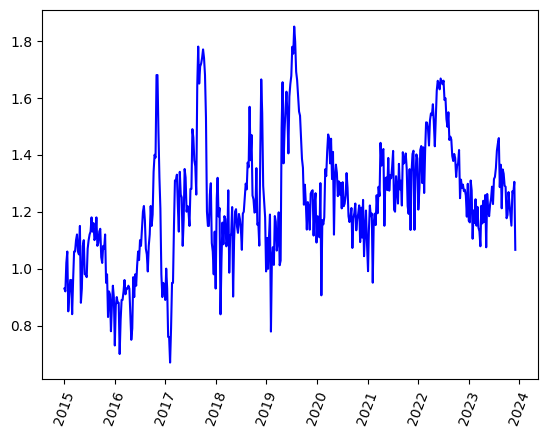

In [59]:
df.Date.unique()
df.region.unique()
california = df[(df.region == 'California') & (df.type == 'conventional')]
plt.plot(california.Date.values, california.AveragePrice.values, color='b')
def prettify():
    plt.xticks(rotation=70)
    plt.show()
prettify()
# plt.xlim(date(2015, 1, 1), date(2015, 1, 15)
plt.show()


In [60]:
california.Date.unique()
california.AveragePrice

12       0.930000
120      0.920000
228      1.020000
336      1.060000
444      0.850000
           ...   
52875    1.150927
52950    1.271865
53068    1.265615
53186    1.304916
53304    1.066007
Name: AveragePrice, Length: 466, dtype: float64

/var/folders/3q/37b0tth55xxdfn82hcm7ylp80000gn/T/ipykernel_37884/4068053598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california['price_lag1'] = california.AveragePrice.shift(1)
/var/folders/3q/37b0tth55xxdfn82hcm7ylp80000gn/T/ipykernel_37884/4068053598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california['delta_lag1'] = california.AveragePrice / california.price_lag1 - 1


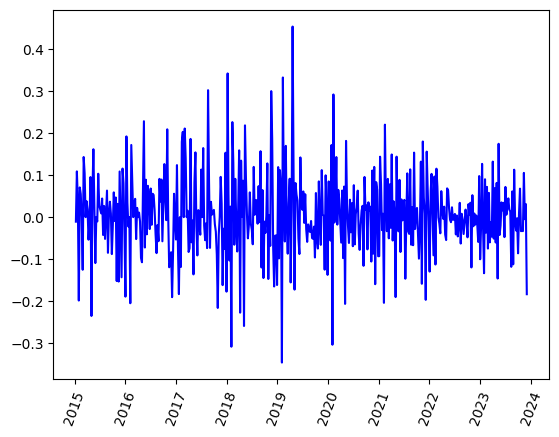

In [61]:
california['price_lag1'] = california.AveragePrice.shift(1)
california['delta_lag1'] = california.AveragePrice / california.price_lag1 - 1
plt.plot(california.Date, california.delta_lag1, 'b')
prettify()


In [62]:
california.delta_lag1.std()

0.09796160728878076

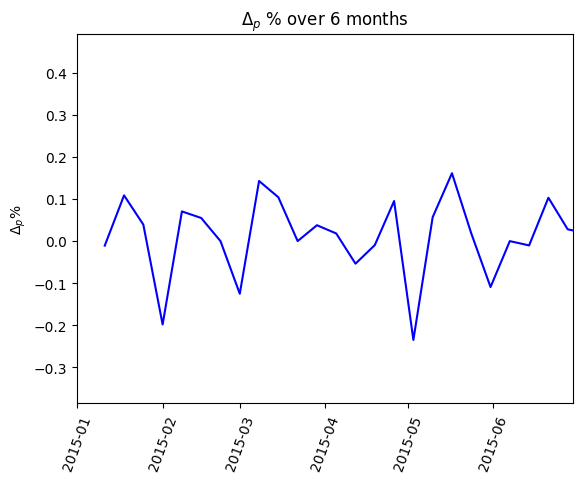

In [63]:
# а теперь за полгода
plt.plot(california.Date, california.delta_lag1, 'b')
plt.xlim(date(2015, 1, 1), date(2015, 6, 30))
plt.ylabel(r'$\Delta_p $%')
plt.title(r'$\Delta_p$ % over 6 months')
prettify()


In [65]:
california['sales_delta'] = california.TotalVolume / california.TotalVolume.shift(1) - 1

/var/folders/3q/37b0tth55xxdfn82hcm7ylp80000gn/T/ipykernel_37884/1346963643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california['sales_delta'] = california.TotalVolume / california.TotalVolume.shift(1) - 1


In [66]:
import numpy as np
california['Delta'] = california.delta_lag1
california[['Date', 'AveragePrice', 'Delta', 'TotalVolume', 'sales_delta']].set_index('Date', drop=True).to_csv('../src/data/california.csv')

/var/folders/3q/37b0tth55xxdfn82hcm7ylp80000gn/T/ipykernel_37884/3949797054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california['Delta'] = california.delta_lag1
